# Library

In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [2]:
data = pd.read_csv('commodities_and_stocks_data.csv', header=[0, 1]) 

In [3]:
data.head()

Ticker         GC=F                            \
                       Price         Open         High          Low   
0                       Date          NaN          NaN          NaN   
1  2020-01-02 00:00:00+00:00  1518.099976  1528.699951  1518.000000   
2  2020-01-03 00:00:00+00:00  1530.099976  1552.699951  1530.099976   
3  2020-01-06 00:00:00+00:00  1580.000000  1580.000000  1560.400024   
4  2020-01-07 00:00:00+00:00  1558.300049  1576.300049  1558.300049   

                                          PL=F                          ...  \
         Close    Adj Close Volume        Open        High         Low  ...   
0          NaN          NaN    NaN         NaN         NaN         NaN  ...   
1  1524.500000  1524.500000  214.0  985.000000  990.000000  978.599976  ...   
2  1549.199951  1549.199951  107.0  986.500000  987.200012  980.599976  ...   
3  1566.199951  1566.199951  416.0  985.799988  985.799988  960.000000  ...   
4  1571.800049  1571.800049   47.0  965.299988  973.000000  959.900024  ...   

        AMZN                                         AAPL             \
         Low      Close  Adj Close      Volume       Open       High   
0        NaN        NaN        NaN         NaN        NaN        NaN   
1  93.207497  94.900497  94.900497  80580000.0  74.059998  75.150002   
2  93.224998  93.748497  93.748497  75288000.0  74.287498  75.144997   
3  93.000000  95.143997  95.143997  81236000.0  73.447502  74.989998   
4  94.601997  95.343002  95.343002  80898000.0  74.959999  75.224998   

                                                 
         Low      Close  Adj Close       Volume  
0        NaN        NaN        NaN          NaN  
1  73.797501  75.087502  72.876122  135480400.0  
2  74.125000  74.357498  72.167610  146322800.0  
3  73.187500  74.949997  72.742653  118387200.0  
4  74.370003  74.597504  72.400543  108872000.0  

[5 rows x 49 columns]

In [7]:
summary_stats = data.describe()
print(summary_stats)

              GC=F                                                      \
              Open         High          Low        Close    Adj Close   
count  1130.000000  1130.000000  1130.000000  1130.000000  1130.000000   
mean   1869.425487  1879.072213  1860.149558  1869.617254  1869.617254   
std     166.485115   167.017753   166.259413   166.628694   166.628694   
min    1469.300049  1484.000000  1452.099976  1477.300049  1477.300049   
25%    1769.475006  1779.624969  1763.975006  1770.500031  1770.500031   
50%    1845.150024  1855.299988  1837.900024  1847.549988  1847.549988   
75%    1946.750031  1958.750031  1938.574951  1946.500031  1946.500031   
max    2429.500000  2435.800049  2421.000000  2433.899902  2433.899902   

                             PL=F                                         ...  \
              Volume         Open         High          Low        Close  ...   
count    1130.000000  1130.000000  1130.000000  1130.000000  1130.000000  ...   
mean     4439.50

In [9]:
close_prices = data.xs('Close', axis=1, level=1)

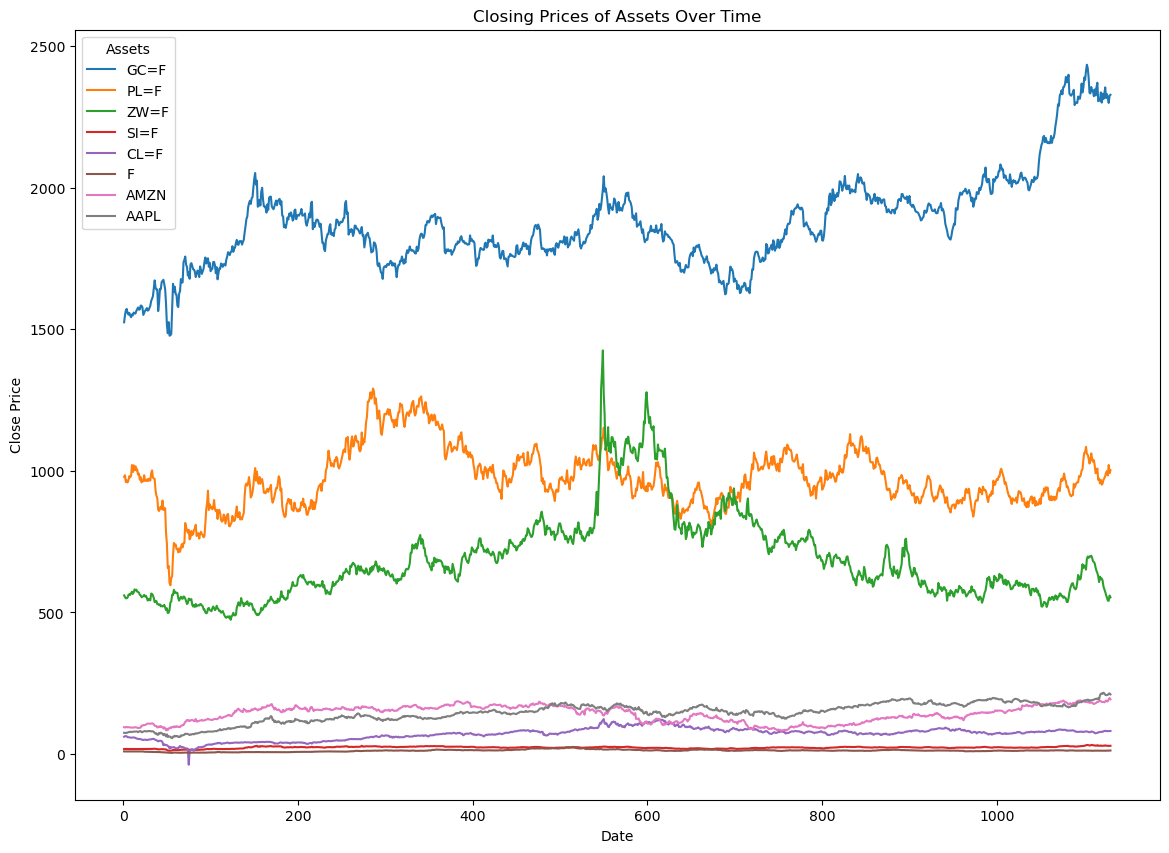

In [10]:
plt.figure(figsize=(14, 10))
for column in close_prices.columns:
    plt.plot(close_prices.index, close_prices[column], label=column)

# Adding titles and labels
plt.title("Closing Prices of Assets Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(title="Assets")
plt.show()

In [12]:
# Calculate daily returns for each asset by taking the percentage change of the closing prices
daily_returns = close_prices.pct_change().dropna()  # Remove NaN values resulting from the initial shift

# Display the first few rows of daily returns to confirm calculations
daily_returns.head()

,GC=F,PL=F,ZW=F,SI=F,CL=F,F,AMZN,AAPL
2,0.016202,0.006029,-0.010263,0.005677,0.030566,-0.022293,-0.012139,-0.009722
3,0.010973,-0.024479,-0.008115,0.001605,0.003489,-0.005429,0.014886,0.007968
4,0.003576,0.005831,0.000455,0.012101,-0.009009,0.009825,0.002092,-0.004703
5,-0.009161,-0.007246,0.004543,-0.012448,-0.049282,0.000000,-0.007809,0.016086
6,-0.003660,0.008446,0.017187,-0.012605,-0.000839,0.001081,0.004799,0.021241


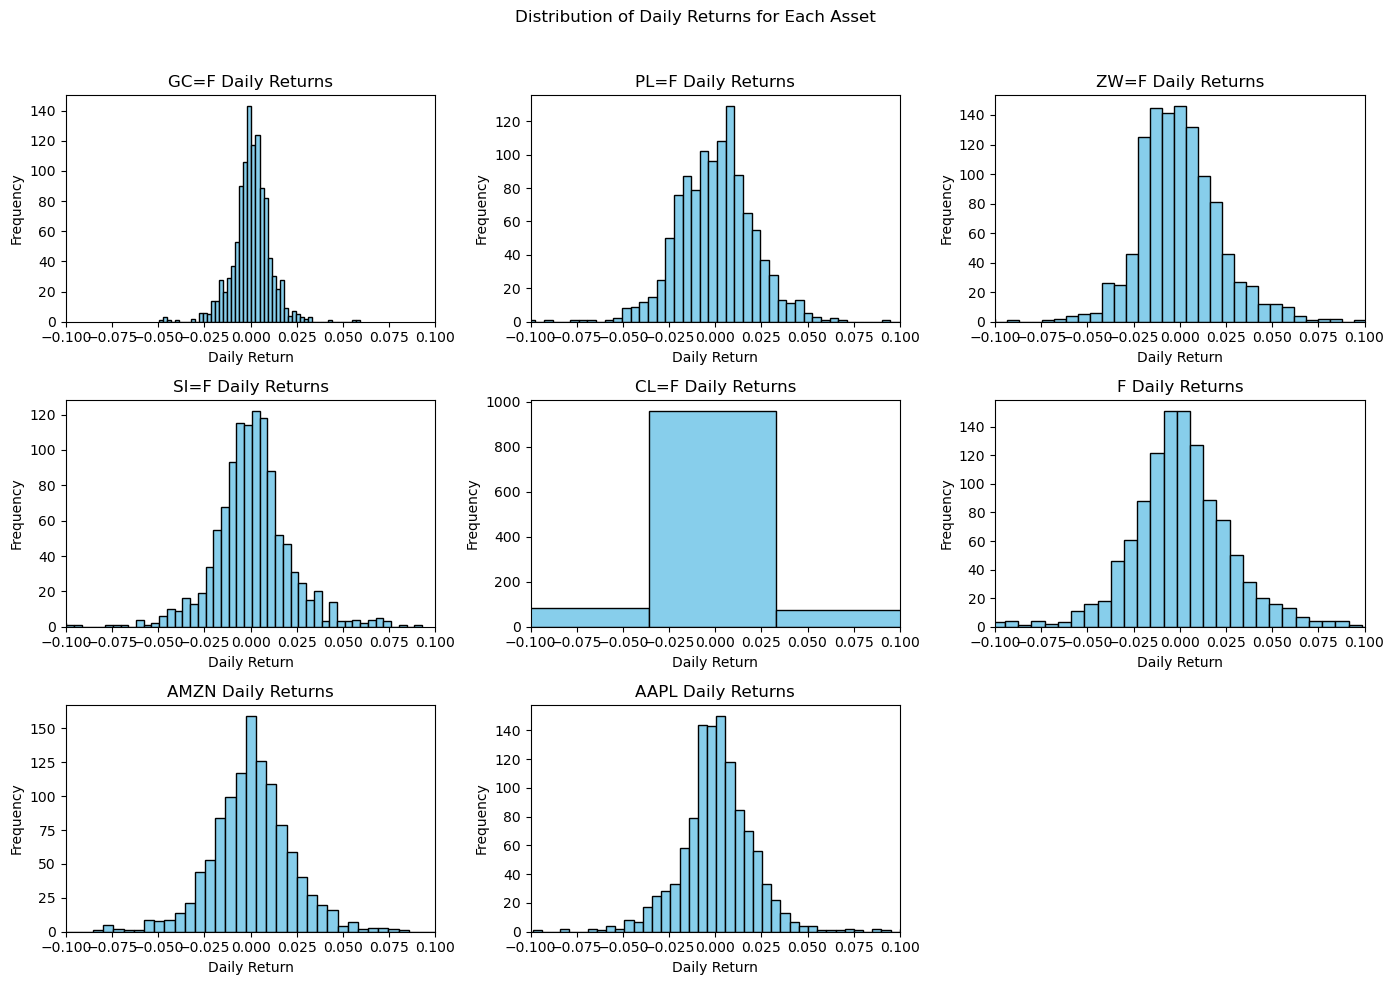

In [13]:
# Plot histograms of daily returns for each asset to observe the distribution and potential volatility
plt.figure(figsize=(14, 10))
for i, column in enumerate(daily_returns.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(daily_returns[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f"{column} Daily Returns")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.xlim(-0.1, 0.1)  # Zoom in on main distribution area

plt.suptitle("Distribution of Daily Returns for Each Asset")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

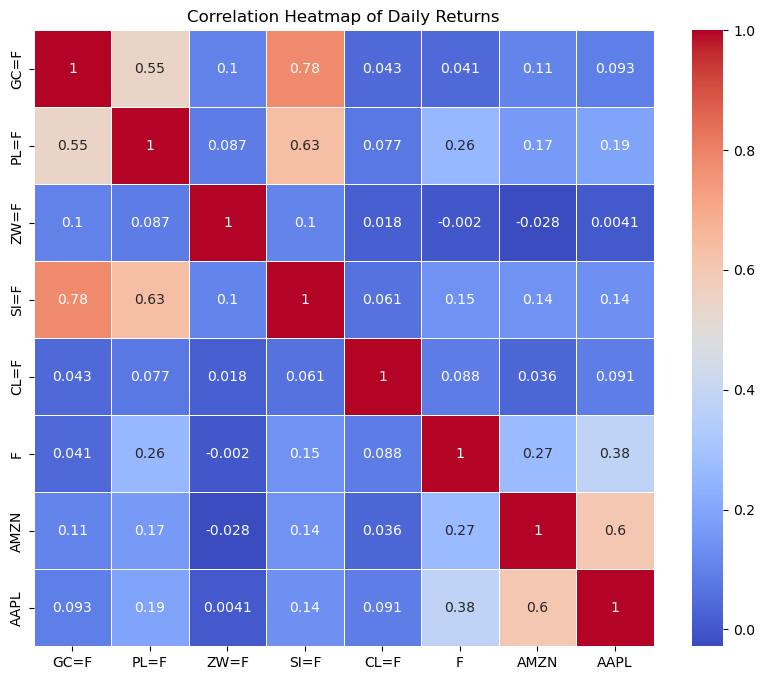

In [14]:
# Calculate the correlation matrix for daily returns
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Daily Returns")
plt.show()

## Indicators

In [15]:
# Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))



In [16]:
# Define a list of stock tickers in the dataset
stock_tickers = ['AAPL', 'AMZN', 'F']

# Loop through each stock ticker and add indicators
for ticker in stock_tickers:
    # Simple Moving Average (SMA)
    data[(ticker, 'SMA_20')] = data[(ticker, 'Close')].rolling(window=20).mean()
    data[(ticker, 'SMA_50')] = data[(ticker, 'Close')].rolling(window=50).mean()

    # Exponential Moving Average (EMA)
    data[(ticker, 'EMA_12')] = data[(ticker, 'Close')].ewm(span=12, adjust=False).mean()
    data[(ticker, 'EMA_26')] = data[(ticker, 'Close')].ewm(span=26, adjust=False).mean()

    # Moving Average Convergence Divergence (MACD) and Signal Line
    data[(ticker, 'MACD')] = data[(ticker, 'EMA_12')] - data[(ticker, 'EMA_26')]
    data[(ticker, 'Signal_Line')] = data[(ticker, 'MACD')].ewm(span=9, adjust=False).mean()

    # Relative Strength Index (RSI)
    data[(ticker, 'RSI')] = calculate_rsi(data[(ticker, 'Close')])

    # Bollinger Bands
    data[(ticker, 'Upper_Band')] = data[(ticker, 'SMA_20')] + 2 * data[(ticker, 'Close')].rolling(window=20).std()
    data[(ticker, 'Lower_Band')] = data[(ticker, 'SMA_20')] - 2 * data[(ticker, 'Close')].rolling(window=20).std()

    # Stochastic Oscillator
    data[(ticker, '14-High')] = data[(ticker, 'High')].rolling(14).max()
    data[(ticker, '14-Low')] = data[(ticker, 'Low')].rolling(14).min()
    data[(ticker, 'Stochastic')] = 100 * (data[(ticker, 'Close')] - data[(ticker, '14-Low')]) / (data[(ticker, '14-High')] - data[(ticker, '14-Low')])

# Displaying a subset of the DataFrame to confirm the indicators have been added for each stock
indicators_all_stocks = data.loc[:, ['AAPL', 'AMZN', 'F']].head(20)  # Show the first 20 rows for selected indicators

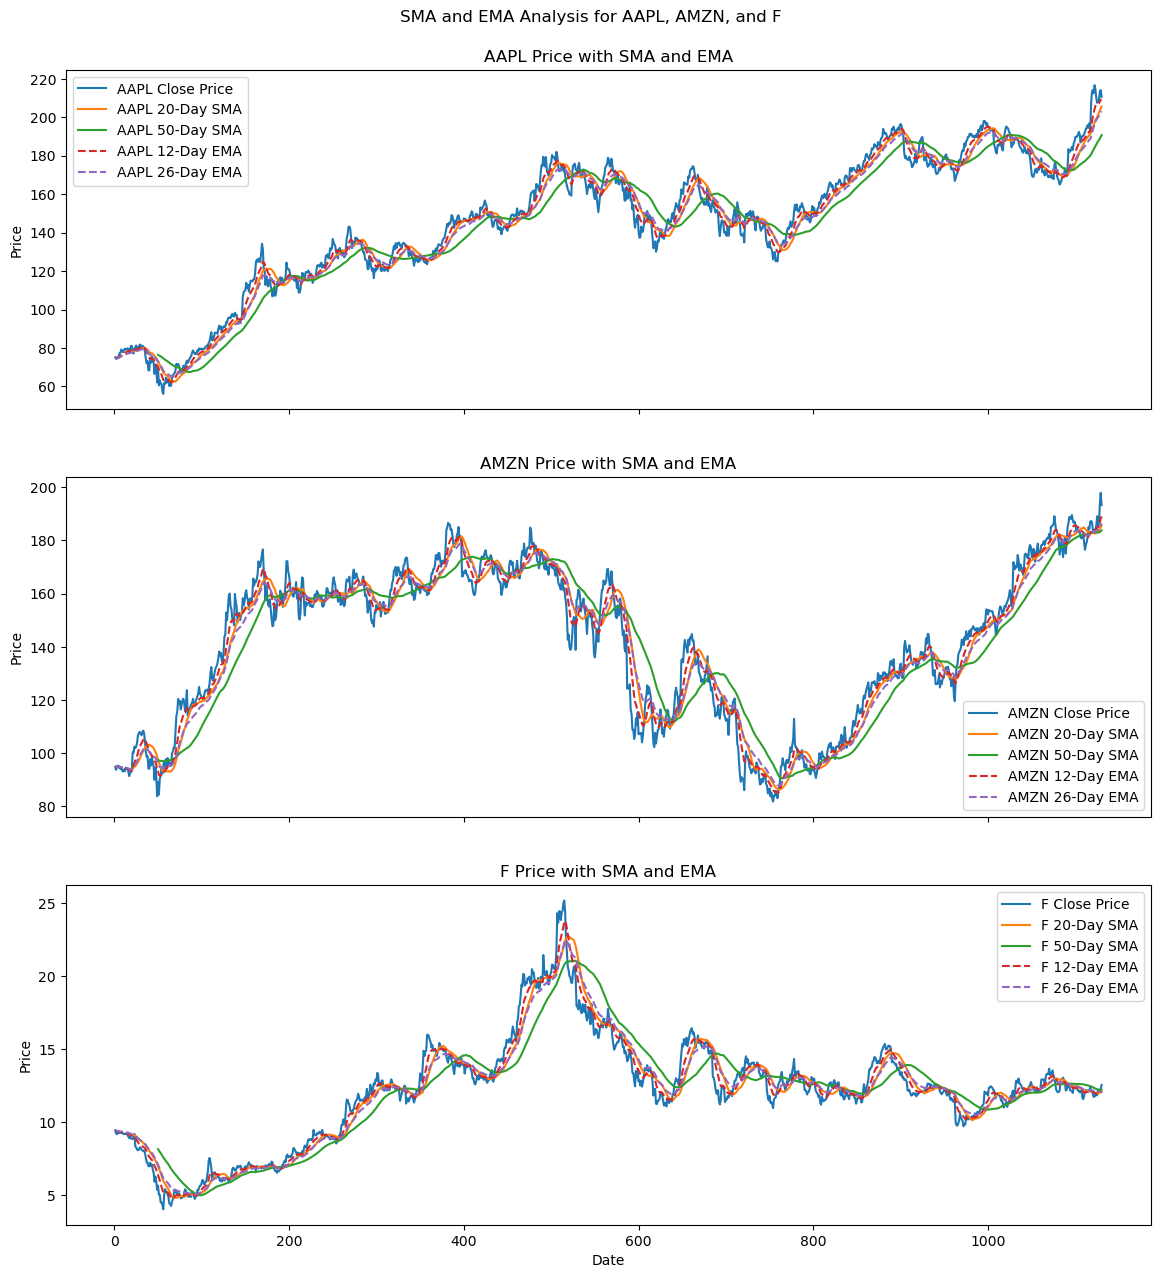

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

for i, ticker in enumerate(stock_tickers):
    # Plot Close price
    axs[i].plot(data.index, data[(ticker, 'Close')], label=f'{ticker} Close Price')
    # Plot SMA
    axs[i].plot(data.index, data[(ticker, 'SMA_20')], label=f'{ticker} 20-Day SMA')
    axs[i].plot(data.index, data[(ticker, 'SMA_50')], label=f'{ticker} 50-Day SMA')
    # Plot EMA
    axs[i].plot(data.index, data[(ticker, 'EMA_12')], linestyle='--', label=f'{ticker} 12-Day EMA')
    axs[i].plot(data.index, data[(ticker, 'EMA_26')], linestyle='--', label=f'{ticker} 26-Day EMA')
    
    axs[i].set_title(f'{ticker} Price with SMA and EMA')
    axs[i].set_ylabel("Price")
    axs[i].legend()

axs[-1].set_xlabel("Date")
plt.suptitle("SMA and EMA Analysis for AAPL, AMZN, and F", y=0.92)
plt.show()

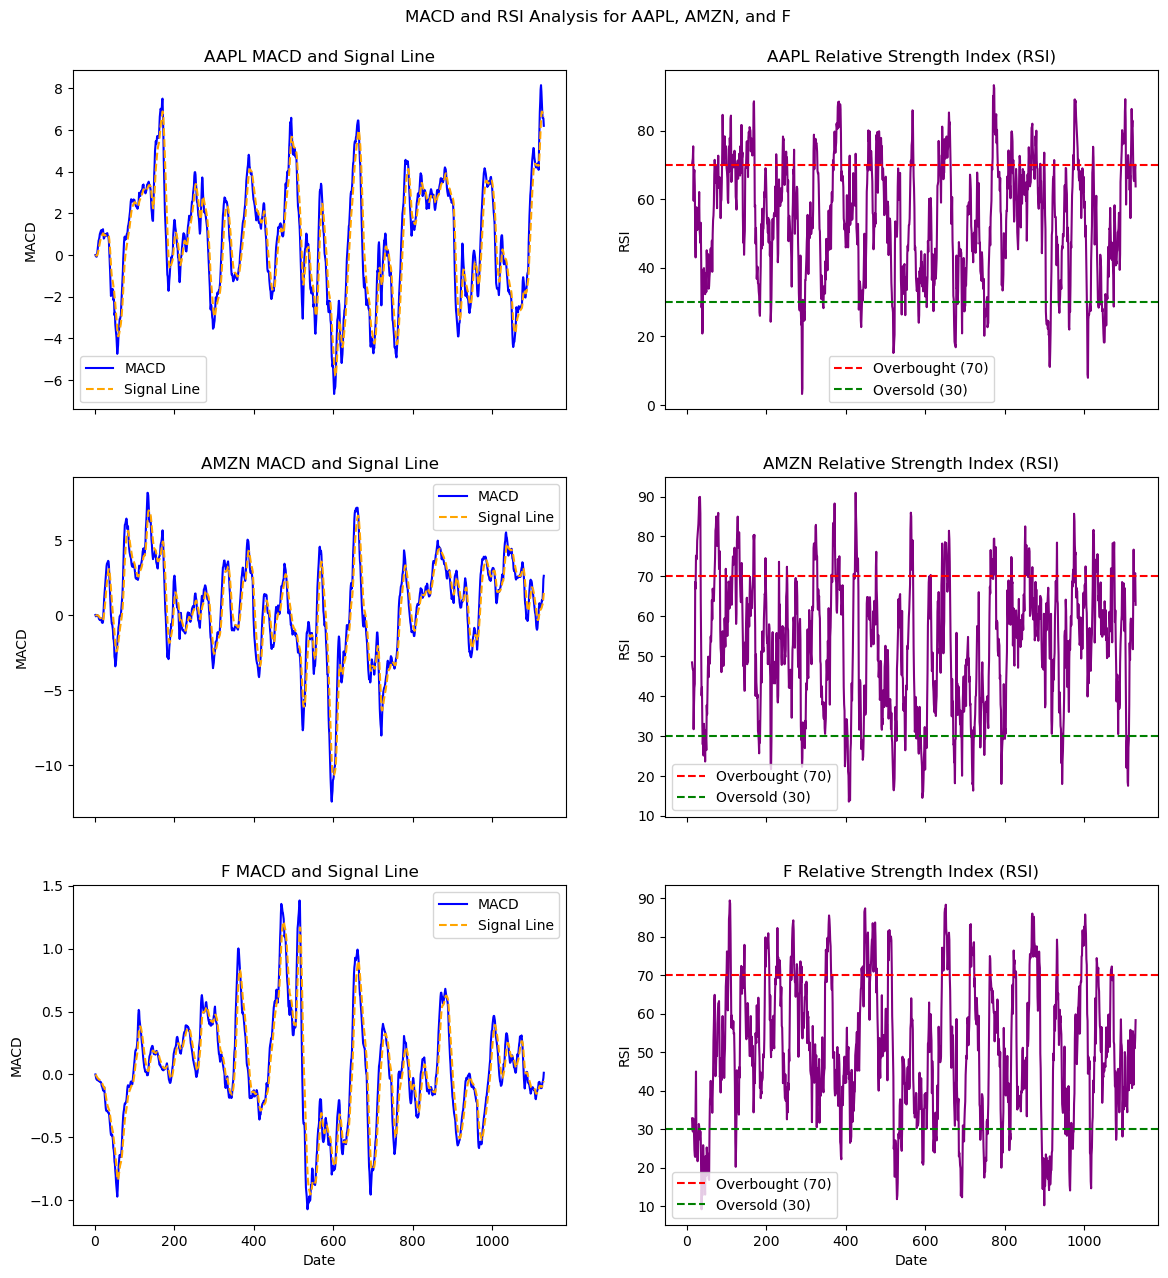

In [18]:
# Plot MACD and RSI for each stock to analyze momentum and reversal signals

fig, axs = plt.subplots(3, 2, figsize=(14, 15), sharex=True)

for i, ticker in enumerate(stock_tickers):
    # MACD Plot
    axs[i, 0].plot(data.index, data[(ticker, 'MACD')], label='MACD', color='blue')
    axs[i, 0].plot(data.index, data[(ticker, 'Signal_Line')], label='Signal Line', color='orange', linestyle='--')
    axs[i, 0].set_title(f'{ticker} MACD and Signal Line')
    axs[i, 0].legend()
    axs[i, 0].set_ylabel("MACD")

    # RSI Plot
    axs[i, 1].plot(data.index, data[(ticker, 'RSI')], color='purple')
    axs[i, 1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axs[i, 1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    axs[i, 1].set_title(f'{ticker} Relative Strength Index (RSI)')
    axs[i, 1].legend()
    axs[i, 1].set_ylabel("RSI")

axs[-1, 0].set_xlabel("Date")
axs[-1, 1].set_xlabel("Date")
plt.suptitle("MACD and RSI Analysis for AAPL, AMZN, and F", y=0.92)
plt.show()

In [22]:
for ticker in stock_tickers:
    # Shift the closing price by -1 to determine if the next day's price is higher
    data[(ticker, 'Target')] = (data[(ticker, 'Close')].shift(-1) > data[(ticker, 'Close')]).astype(int)



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [34]:
scaler = StandardScaler()

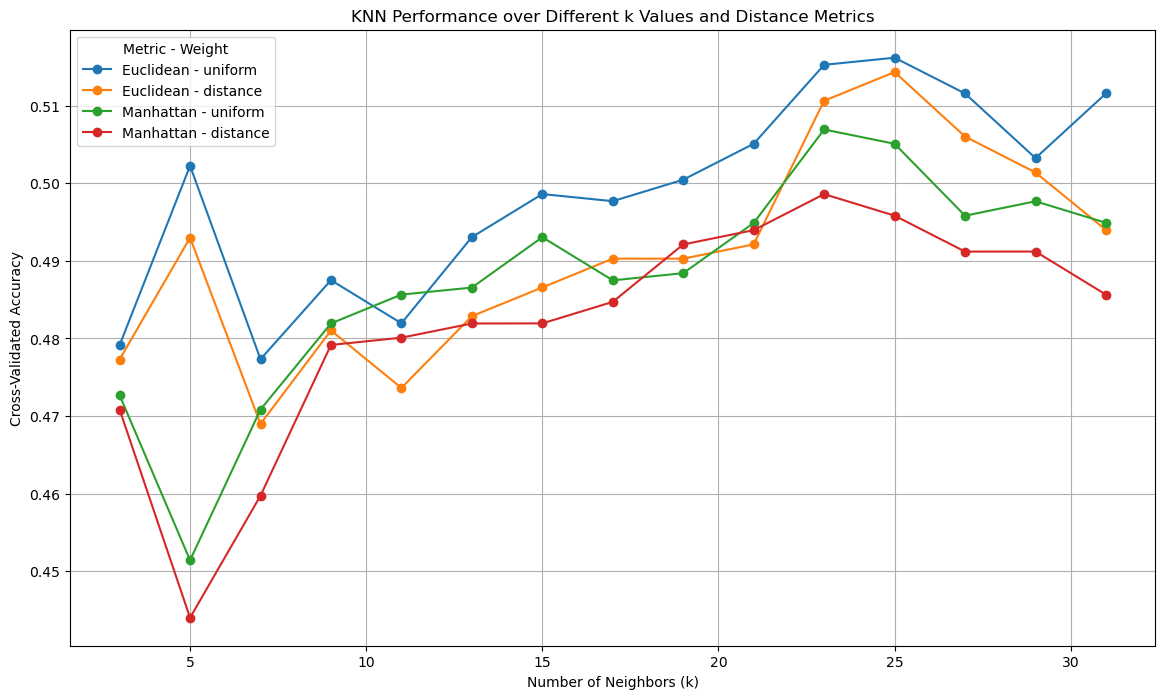

In [32]:
# Setting up the parameters to test
k_values = [i for i in range(3,32,2)]
metrics = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

# Prepare features and target for AAPL
ticker = 'AAPL'
features = data[
    [
        (ticker, 'SMA_20'), 
        (ticker, 'SMA_50'), 
        (ticker, 'EMA_12'), 
        (ticker, 'EMA_26'), 
        (ticker, 'MACD'), 
        (ticker, 'Signal_Line'), 
        (ticker, 'RSI'), 
        (ticker, 'Stochastic')
    ]
].dropna()

target = data[(ticker, 'Target')].dropna()

# Align features and target to ensure they match after NaN removal
features, target = features.align(target, join='inner', axis=0)

# Scale the features
X_scaled = scaler.fit_transform(features)

# Dictionary to hold mean cross-validation accuracy scores
grid_results = {'k': [], 'metric': [], 'weight': [], 'accuracy': []}

# Loop over each combination of parameters and perform cross-validation
for metric in metrics:
    for weight in weights:
        for k in k_values:
            # Set up the KNN model with the current parameters
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            # Perform cross-validation
            scores = cross_val_score(knn, X_scaled, target, cv=5, scoring='accuracy')
            # Record the mean accuracy for this combination of parameters
            grid_results['k'].append(k)
            grid_results['metric'].append(metric)
            grid_results['weight'].append(weight)
            grid_results['accuracy'].append(np.mean(scores))

# Convert results to DataFrame for easy plotting
grid_df = pd.DataFrame(grid_results)

# Plotting the results
plt.figure(figsize=(14, 8))
for metric in metrics:
    for weight in weights:
        subset = grid_df[(grid_df['metric'] == metric) & (grid_df['weight'] == weight)]
        plt.plot(subset['k'], subset['accuracy'], marker='o', label=f'{metric.capitalize()} - {weight}')

plt.title("KNN Performance over Different k Values and Distance Metrics")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.legend(title="Metric - Weight")
plt.grid(True)
plt.show()

In [33]:
# Dictionary to store results for each stock
results = {}

param_grid = {
    'n_neighbors': [i for i in range(3,32,2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

for ticker in stock_tickers:
    # Prepare features (technical indicators) and target for the current stock
    features = data[
        [
            (ticker, 'SMA_20'), 
            (ticker, 'SMA_50'), 
            (ticker, 'EMA_12'), 
            (ticker, 'EMA_26'), 
            (ticker, 'MACD'), 
            (ticker, 'Signal_Line'), 
            (ticker, 'RSI'), 
            (ticker, 'Stochastic')
        ]
    ].dropna()  # Drop NaNs to ensure complete rows

    target = data[(ticker, 'Target')].dropna()
    
    # Align features and target to ensure they match after NaN removal
    features, target = features.align(target, join='inner', axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate and set up GridSearchCV for KNN
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Evaluate the best model on the test set
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store the results for the current stock
    results[ticker] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Displaying the results for each stock to the user
results

{'AAPL': {'Best Parameters': {'metric': 'manhattan',
   'n_neighbors': 23,
   'weights': 'uniform'},
  'Accuracy': 0.5483870967741935,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.48      0.49        98\n           1       0.59      0.61      0.60       119\n\n    accuracy                           0.55       217\n   macro avg       0.54      0.54      0.54       217\nweighted avg       0.55      0.55      0.55       217\n'},
 'AMZN': {'Best Parameters': {'metric': 'euclidean',
   'n_neighbors': 3,
   'weights': 'uniform'},
  'Accuracy': 0.5299539170506913,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.57      0.51      0.54       117\n           1       0.49      0.55      0.52       100\n\n    accuracy                           0.53       217\n   macro avg       0.53      0.53      0.53       217\nweighted avg       0.53      0.53      0.53       217\n'},